In [2]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [4]:
N = 3
M = 3
V = 1
T = 5
dt = 0.01

J_V_init = 0.1
J_V_final = 0.5
mu_V_init = 10
mu_V_final = 0

num_free_points = 5
num_control_points = num_free_points + 2  # Intermediate free points + 2 end points

# Run optimization
results = create_optimal_piecewise_linear_paths(N, M, T, dt, V, J_V_init, J_V_final, mu_V_init, mu_V_final, num_control_points, alpha = 2)
(times_dense, J_V_path, mu_V_path, obj_value, opt_params, t_control_opt, J_control_opt, mu_control_opt) = results

print(f"Optimized J/V:")
print(*(np.around(J_control_opt,3)), sep = ", ")
print(f"Optimized mu/V:")
print(*(np.around(mu_control_opt,3)), sep = ", ")
print(f"Optimized t/V:")
print(*(np.around(t_control_opt,3)), sep = ", ")

Optimized J/V:
0.1, 0.077, 0.07, 0.092, 0.161, 0.291, 0.5
Optimized mu/V:
10.0, 8.317, 6.637, 4.964, 3.299, 1.644, 0.0
Optimized t/V:
0.0, 0.149, 0.557, 1.249, 2.214, 3.527, 5.0


Ground State Manifold Overlap: 0.10263514150165033


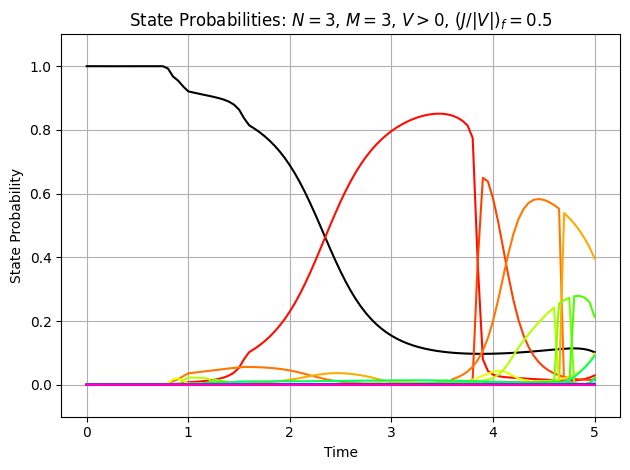

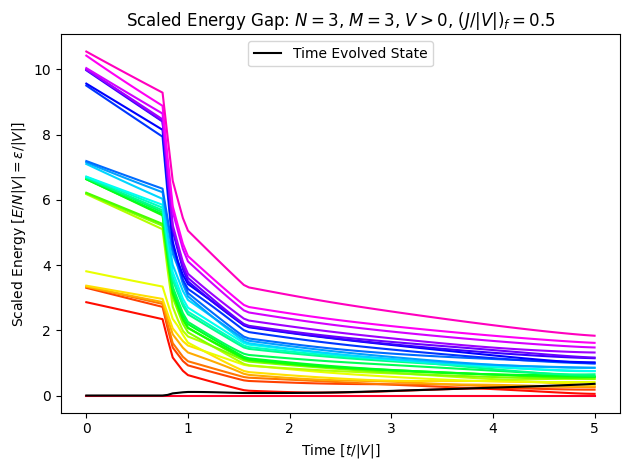

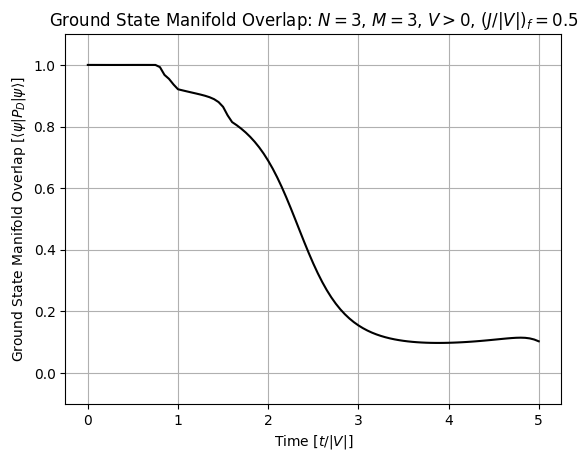

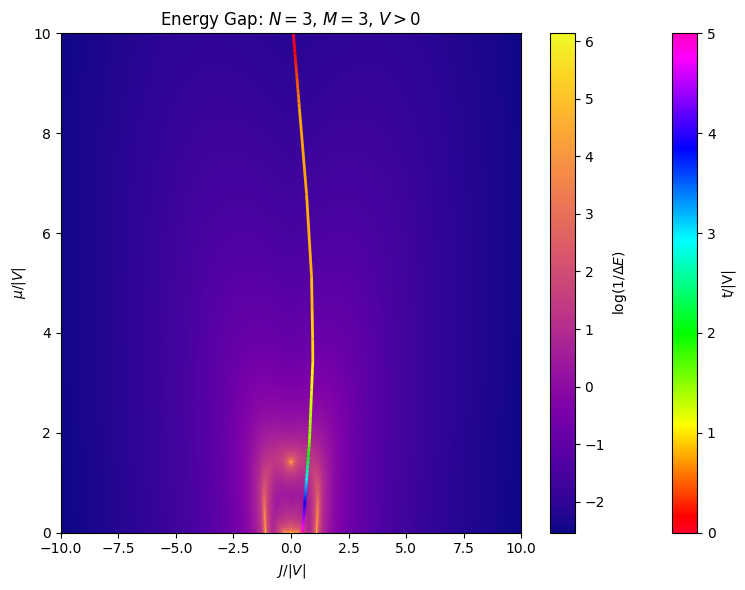

In [10]:
hamiltonians = []
for i, t in enumerate(times_dense):
    ham = construct_rescaled_hamiltonian(N, M, V, mu_V_ratio=mu_V_path[i],J_V_ratio=J_V_path[i])
    hamiltonians.append(ham)

results = simulate_hamiltonian_time_evolution(hamiltonians, times_dense)

print(f"Ground State Manifold Overlap: {results[-1][-1]}")

if np.sign(V) > 0:
    plot_time_evolution(N, M, 'positive', results, times_dense, J_V_ratios = J_V_path, mu_V_ratios = mu_V_path, plot_overlaps = False, plot_sigma = False)
else:
    plot_time_evolution(N, M, 'negative', results, times_dense, J_V_ratios = J_V_path, mu_V_ratios = mu_V_path, plot_overlaps = False, plot_sigma = False)

if np.sign(V) > 0:
    plot_data(N, M, sign_V="positive", gap_or_sigma="energy_gap", include_path = True, mu_V_ratios = mu_V_path, J_V_ratios = J_V_path, times = times_dense)
else:
    plot_data(N, M, sign_V="negative", gap_or_sigma="energy_gap", include_path = True, mu_V_ratios = mu_V_path, J_V_ratios = J_V_path, times = times_dense)

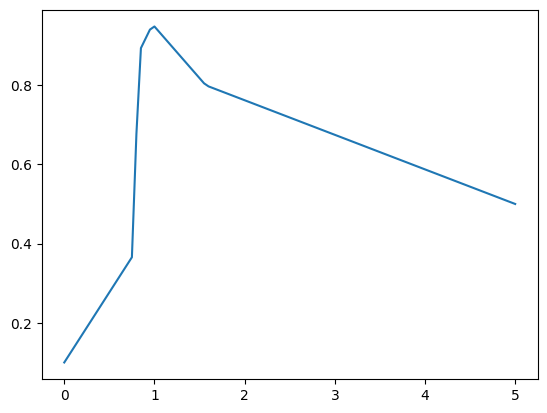

In [13]:
fig, ax = plt.subplots()

ax.plot(times_dense, J_V_path)

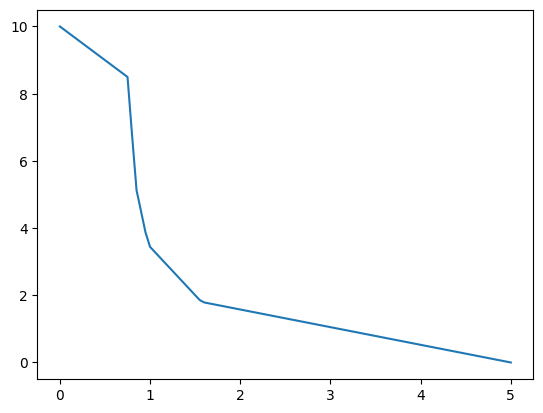

In [14]:
fig, ax = plt.subplots()

ax.plot(times_dense, mu_V_path)